# Summarizing metrics from SDT vertical lines

Leanne Friedrich 11/15/22

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import matplotlib.pyplot as plt
import py.metrics.m_plot.m_plots as mp
import py.metrics.m_SDT as me
import regression as rg
import matplotlib.cm as cm
import py.file.file_handling as fh
LOGGERDEFINED = logs.openLog('summary_vert_SDT.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# initialize object to hold data

In [3]:
# get an object that holds summary data for all files
ms = me.summarySDT(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'VertSDTSummaries.csv')
                             , diag=True)

Independents: 
	 meta        :  bn, calibFile, fluFile, printFolderR
	                date
	 meta sup    :  sup_base, sup_days, sup_dye, sup_rheModifier, sup_shortname, sup_surfactant, sup_surfactantWt, sup_type, sup_var
	 meta ink    :  ink_base, ink_days, ink_dye, ink_rheModifier, ink_shortname, ink_surfactant, ink_surfactantWt, ink_type, ink_var
	 const       :  GaRatio, GdRatio, gname, GtaRatio, int_Ca, int_CaInv, int_Re, ReRatio, tau0aRatio, tau0dRatio, tGdRatio, viscRatio, vRatio
	                dEst, hDragP, pressureCh0, rGrava, rGravd, sigma, spacing, spacing_adj, vDragP, zdepth
	 const sup   :  sup_Bma, sup_Bmd, sup_Ca, sup_CaInv, sup_diluent, sup_diluentWt, sup_dnorma, sup_dnorma_adj, sup_dnormd, sup_dnormd_adj, sup_dnormInva, sup_dnormInvd, sup_Oh, sup_OhInv, sup_Re, sup_We, sup_WeInv
	                sup_density, sup_dPRa, sup_dPRd, sup_eta0a, sup_eta0d, sup_Gstora, sup_Gstord, sup_rate, sup_tau0a, sup_tau0d, sup_v, sup_val, sup_visc0
	 const ink   :  ink_Bma, ink_Bmd, ink

,1,2,3
wp,X_w1p,X_w2p,X_w3p
wo,X_w1o,X_w2o,X_w3o
dw/dt,dXdt_w1o,dXdt_w2o,dXdt_w3o
wrelax,delta_X_w1relax,delta_X_w2relax,delta_X_w3relax
write,delta_X_write1,delta_X_write2,
dp,X_d1p,X_d2p,
do,X_d1o,X_d2o,
dd/dt,dXdt_d1o,dXdt_d2o,
drelax,delta_X_d1relax,delta_X_d2relax,
disturb,delta_X_disturb1,delta_X_disturb2,


# dependent variable correlations

In [ ]:
# export correlations between dependent variables
ms.depCorrelations(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'vertSDTCorrs.csv'))

In [ ]:
# plot the correlation between two dependent variables
ms.depCorrelation('delta_x0_write3', 'dx0_w3p', plot=True)

# qualitative plots

In [ ]:
for cvar in ['l1w1', 'l1w1relax', 'l1d1', 'l1w2']:
    sl1 = ['dnorma_adj', 'dnormd_adj', 'Bma']
    sl2 = ['Ca', 'Oh', 'Re']
    if cvar=='l1w2':
        ssi = ms.ss[ms.ss.spacing==0.5]
    else:
        ssi = ms.ss
    qsd1 = mp.qualityScatterXY(ms, ssi
                               , [[f'sup_{s}' for s in sl] for sl in [sl1, sl2]]
                               , [[f'ink_{s}' for s in sl] for sl in [sl1, sl2]]
                               , cvar=cvar, simplify=False
                               , logx=True, logy=True, plotType='paper', figsize=(7.5, 7))
    qsd1.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', f'{cvar}_vert_xvars'))

In [ ]:
cvlw1 = mp.qualityScatterSpacing(ms, ms.ss, xvar='int_Ca', yvar='meanT_w1o', cvar0='l1w1', dx=0.05, dy=0.05, logx=True, logy=True, plotType='notebook', figsize=(14,6))

In [ ]:
cvlw1 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='meanT_w1o', y0var='meanT_w1o', cvar0='l1d1', dx=0.05, dy=0.05, logx=True, logy=False, plotType='notebook', figsize=(14,6))

In [ ]:
qsw1 = mp.qualityScatterSimple(ms, ms.ss, 'sup_dnormd_adj', '', y0var='spacing_adj', cvar0='l1w1'
                               , simplify=True, logx=True, plotType='paper', figsize=(4,5))
qsw1.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w1_vert'))

In [ ]:
qsd1 = mp.qualityScatterSimple(ms, ms.ss, 'sup_dnormd_adj', 'spacing_adj', cvar0='l1d1'
                               , simplify=True, logx=True, plotType='paper', figsize=(4,5))
qsd1.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1d1_vert'))

In [ ]:
qsw2 = mp.qualityScatterSimple(ms, ms.ss, 'sup_dnormd_adj', 'spacing_adj', cvar0='l1w2'
                               , simplify=False, logx=True, plotType='paper', figsize=(4,5))
qsw2.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w2_vert'))

In [ ]:
qsw2 = mp.qualityScatterSimple(ms, ms.ss, 'sup_dnormd_adj', 'spacing_adj', cvar0='l1w2', simplify=False
                               , logx=True, rigid=True, dx=0.05, dy=0.05, plotType='paper', figsize=(4,5))
#qsw2.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w2_vert'))

In [ ]:
qsw205 = mp.qualityScatterSimple(ms, ms.ss, 'sup_dnormd_adj', 'ink_dnormd_adj', cvar0='l1w2', relax=False, spacing=0.5,
                                 dx=0.05, dy=0.05, rigid=True, simplify=True, logx=True, logy=True, plotType='paper', figsize=(4.2,4))
qsw205.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w2_vert_05'))

In [ ]:
cvld1 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='ink_dnormd', cvar0='l1d1', dx=0.05, dy=0.05, logx=True, logy=True, plotType='notebook', figsize=(14,6))

In [ ]:
cvlw2 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd_adj', yvar='ink_dnormd_adj', cvar0='l1w2'
                            , dx=0.05, dy=0.05, logx=True, logy=True, plotType='paper', figsize=(12,5))

In [ ]:
cvlw2.axs[0,0].set_ylim([0.4, 2.6])
cvlw2.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w2_vert_spacing'))

In [ ]:
cvld2 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd_adj', yvar='ink_dnormd_adj', cvar0='l1d2', dx=0.05, dy=0.05, logx=True, logy=True, plotType='paper', figsize=(12,5))

In [ ]:
cvld2.axs[0,0].set_ylim([0.4, 2.6])
cvld2.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1d2_vert_spacing'))

In [ ]:
cvlw3 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd_adj', yvar='ink_dnormd_adj', cvar0='l1w3', dx=0.05, dy=0.05, logx=True, simplify=False, logy=True, plotType='paper', figsize=(12,5))

cvlw3.axs[0,0].set_ylim([0.4, 2.6])
cvlw3.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w3_vert_spacing'))

In [ ]:
cvlw3 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd_adj', yvar='ink_dnormd_adj', cvar0='l1w2w3', dx=0.05, dy=0.05, logx=True, logy=True, plotType='paper', figsize=(12,5))

cvlw3.axs[0,0].set_ylim([0.4, 2.6])
cvlw3.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w2w3_vert_spacing'))

In [ ]:
cvlw3e = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd_adj', yvar='ink_dnormd_adj', cvar0='l1w3end', dx=0.05, dy=0.05, logx=True, logy=True, plotType='paper', figsize=(12,5))

cvlw3e.axs[0,1].set_ylim([3*10**-4, 3*10**-1])
cvlw3e.axs[0,1].set_yticks([10**-3, 10**-2, 10**-1])
cvlw3e.axs[0,1].set_xlim([4*10**-3, 2*10**0])
cvlw3e.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w3end_vert_spacing'))

# quantitative plots

In [ ]:
# plot a variable across many steps in the printing process
yvl = mp.yvarlines(ms, ms.ss, xvar='sup_Oh', yvar='roughness', cvar='spacing', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)
yvl.fig

In [ ]:
# get a list of files that have measurements within a certain range
ms.reduceRows('delta_emptiness_disturb2', ms.ss.sup_Oh>50, ms.ss.spacing==0.625, yvarmax=-0.2)

# export plots

In [ ]:
# plot shrinkage for single/double lines
yvl = mp.shrinkagePlot(ms, r'SDT\SO\I_SO9_S_3.00\I_SO9_S_3.00_230721\disturbVert2_1_0.750', export=True)
yvl.fig

In [ ]:
# plot shrinkage for double/triple lines
yvl = mp.shrinkage3Plot(ms, 'V', export=True)
yvl.fig

In [ ]:
# plot vertical shifts for single/double lines
yvl = mp.shiftPlot(ms, 'V', 'sup_Oh', export=True)
yvl.fig

In [ ]:
# plot fusion for single/double lines
mp.fusionPlot(ms, 'V', export=True).fig

In [ ]:
# plot fusion for double/triples lines
mp.fusion3Plot(ms, 'V', export=True).fig

# export regressions

In [7]:
# export regression tables and relevant plots
def exportRegression(var, **kwargs) -> None:
    mp.regressionTableSDT(ms, ms.ss, var, logy=False, printOut=False,  package='tabularShort', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, tag='V', exportFolder=os.path.join(cfg.path.fig, 'SDT')
                         , **kwargs)

In [ ]:
exportRegression('dhndt_w2o')

In [ ]:
# shrinkage
exportRegression('dhndt_w1o')
exportRegression('delta_hn_disturb1', Camax=1)
exportRegression('delta_hn_disturb1')
exportRegression('dhndt_d1o')
exportRegression('delta_hn_write2')
exportRegression('delta_hn_write2', Camin=50)
exportRegression('delta_hn_disturb2')
exportRegression('delta_hn_write3', Camin=50)
exportRegression('delta_hn_write3')
exportRegression('ldiff_w2o')
exportRegression('ldiff_w3o')

In [ ]:
# shifting
exportRegression('delta_x0_disturb1')
exportRegression('delta_x0_disturb1', spacing=1.25)
exportRegression('delta_x0_disturb1', Camax=1)
exportRegression('delta_x0_write2')
exportRegression('delta_x0_write2', Camax=1)
exportRegression('delta_x0_write2', spacing=0.5)
exportRegression('delta_x0_write2', spacing=1.25)
exportRegression('delta_x0_disturb2')
exportRegression('delta_x0_write3')

exportRegression('delta_xf_disturb1')
exportRegression('delta_xf_disturb2')


In [ ]:
# shifting
exportRegression('roughness_w2o')
exportRegression('roughness_w2o', spacing=0.875)

exportRegression('emptiness_w2o')
exportRegression('emptiness_w2o', spacing=0.875)
exportRegression('emptiness_w2o', Camax=1)

exportRegression('segments_w2o')

In [ ]:
# fusion 2
exportRegression('delta_roughness_write2')
exportRegression('delta_roughness_write2', spacing=1.25)
exportRegression('delta_roughness_disturb2')
exportRegression('delta_roughness_disturb2', spacing=1.25)
exportRegression('delta_roughness_write3')
exportRegression('delta_roughness_write3', spacing=1.25)

## hn

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_hn_disturb1', logy=False, printOut=False,  package='pgfplot', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.27,1.9e-01
1,spacing_adj,0.17,4.3e-01
2,$Gta_{ink}/Gta_{sup}$,0.48,1.7e-02
3,$tGd_{ink}/tGd_{sup}$,0.48,1.7e-02
4,$Ga_{ink}/Ga_{sup}$,0.48,1.7e-02
5,$Gd_{ink}/Gd_{sup}$,0.48,1.7e-02
6,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,0.48,1.7e-02
7,$\tau_{y.ink.desc}/\tau_{y.sup.desc}$,0.48,1.7e-02
8,$Ca_{ink}$,0.48,1.7e-02
9,$Ca_{ink}\times Ca_{sup}$,0.48,1.7e-02


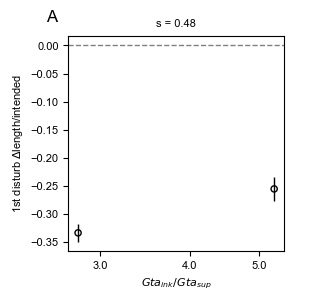

In [25]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_hn_disturb1', Camax=0.65, logy=False, printOut=False, trimVariables=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,zdepth,0.48,1.7e-02


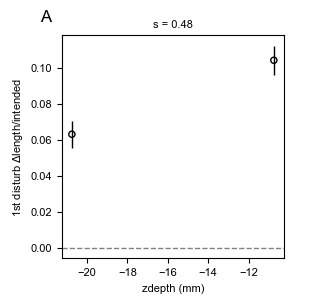

In [218]:
rgt = mp.regressionTableSDT(ms, ms.ss[(ms.ss.int_Ca>15)&(ms.ss.spacing==0.5)], 'delta_hn_disturb1', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dhndt_w1o', logy=False, printOut=False, trimVariables=False, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dhndt_d1o', logy=False, printOut=False, trimVariables=False, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
2,$\eta_{ink}\times \eta_{sup}$,-0.45,3.6e-06


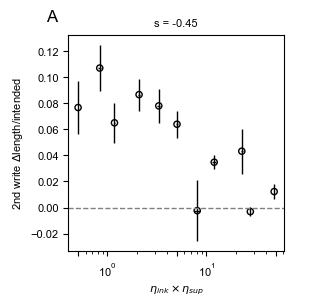

In [19]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_hn_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,$We_{sup}$,0.50,2.1e-07


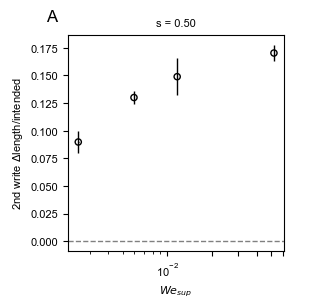

In [20]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'delta_hn_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
2,$\eta_{ink}\times \eta_{sup}$,-0.35,4.1e-04


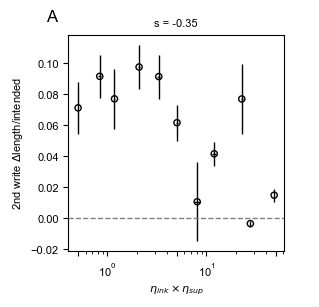

In [21]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.875], 'delta_hn_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,-0.90,1.0e-13
1,spacing_adj,-0.92,2.6e-15


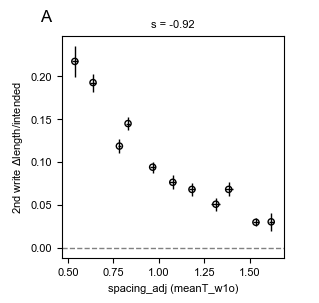

In [22]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca>50], 'delta_hn_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

In [9]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dhndt_w2o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p


In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_hn_disturb2', logy=False, printOut=False, trimVariables=False, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_hn_disturb2', Camax=1, logy=False, printOut=False, trimVariables=False, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,zdepth,0.80,4.1e-07


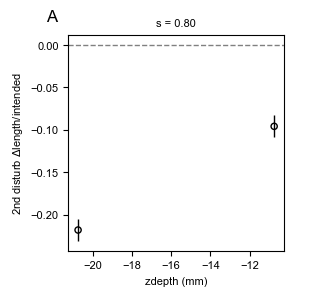

In [183]:
rgt = mp.regressionTableSDT(ms, ms.ss[(ms.ss.int_Ca<1)], 'delta_hn_disturb2', spacing=1.25, logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
6,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.29,3.7e-07
3,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.29,3.7e-07


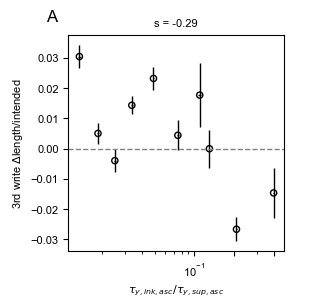

In [30]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_hn_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,-0.59,6.3e-08
1,$We_{sup}$,0.51,6.0e-06
2,$Re_{ink}\times Re_{sup}$,0.57,1.3e-07
3,$Bm_{ink.desc}$,0.71,3.5e-12
4,$Bm_{ink.desc}/Bm_{sup.desc}$,0.70,9.1e-12
5,$\eta_{ink}\times \eta_{sup}$,-0.57,1.3e-07


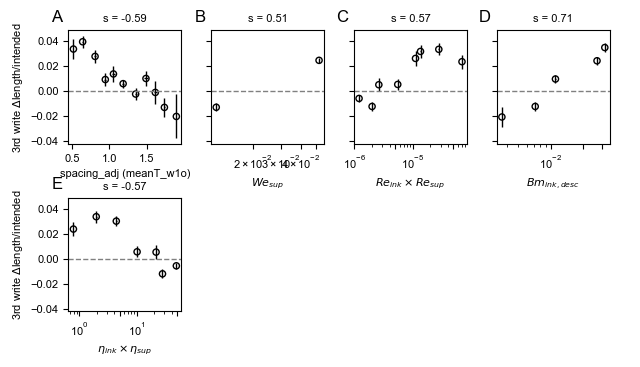

In [28]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca>10], 'delta_hn_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

## ldiff

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.65,1.4e-73
1,$Ca_{sup}$,-0.65,1.4e-73
2,$\overline{d_{PR.sup.asc}}$,-0.66,1.6e-76
3,$\overline{d_{PR.sup.desc}}$,-0.69,1.8e-85
4,$Oh_{sup}$,-0.71,2.8e-92
5,$Re_{sup}$,0.52,2.3e-42
6,$Re_{ink}\times Re_{sup}$,0.50,3.6e-39
7,$Bm_{ink.asc}\times Bm_{sup.asc}$,0.52,3.8e-42
8,$\eta_{sup}$,-0.52,2.3e-42


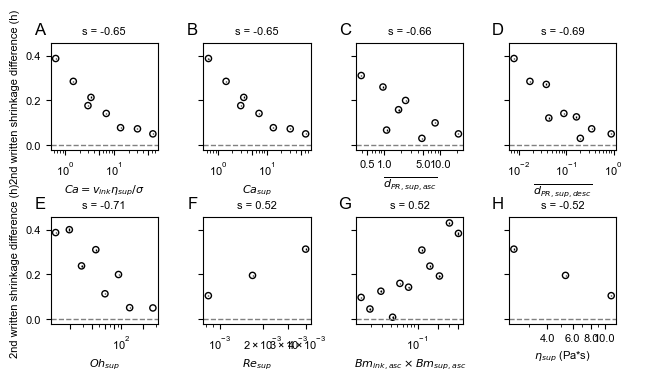

In [40]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'ldiff_w2o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Ca$,0.43,6.2e-15
2,$Ca_{sup}$,0.43,6.2e-15


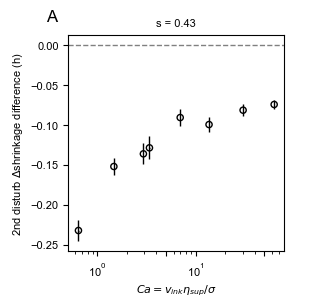

In [41]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_ldiff_disturb2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.57,4.6e-27
1,$Ca_{sup}$,-0.57,4.6e-27
2,$\overline{d_{PR.sup.asc}}$,-0.59,7.1e-30
3,$\overline{d_{PR.sup.desc}}$,-0.61,7.6e-32
4,$Oh_{sup}$,-0.63,2.4e-34


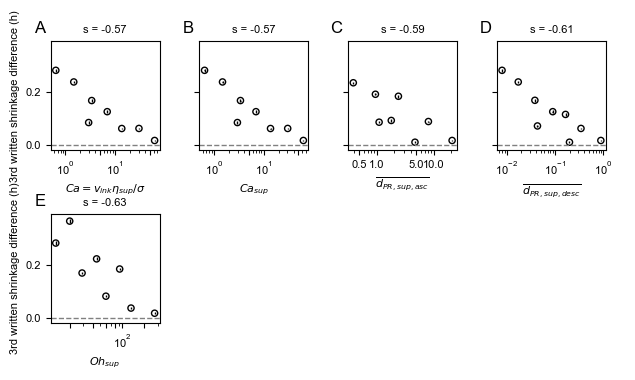

In [43]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'ldiff_w3o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,$Oh_{sup}$,0.24,2.3e-05


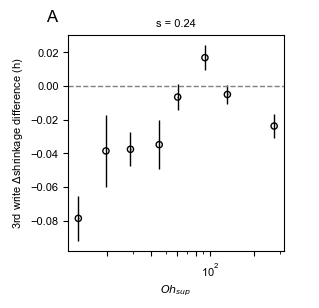

In [44]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_ldiff_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

## meanT

,variable,Spearman coeff,Spearman p
0,$Oh_{sup}$,-0.57,3.8e-26
1,$Re_{sup}$,0.55,5.4e-24
2,$\eta_{sup}$,-0.55,5.4e-24


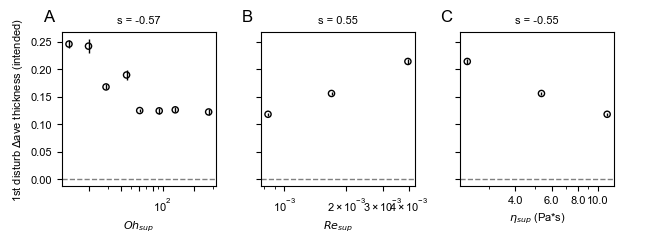

In [46]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_meanT_disturb1', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

## emptiness

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.57,1.8e-51
1,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.57,1.8e-51


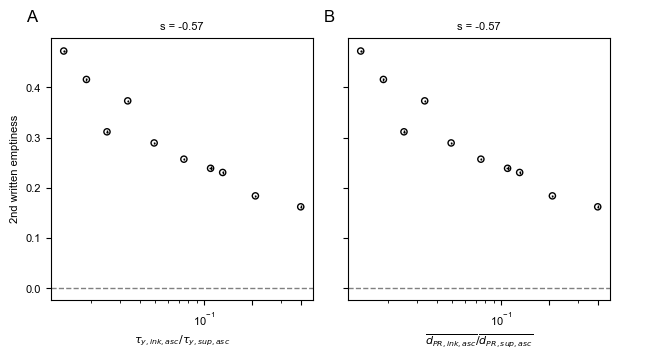

In [48]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'emptiness_w2o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.72,9.0e-17
1,$Ca_{ink}/Ca_{sup}$,-0.56,2.4e-09
2,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.72,9.0e-17
3,$\overline{d_{PR.sup.desc}}$,0.53,1.9e-08
4,$Oh_{sup}$,0.59,1.5e-10
5,$Oh_{ink}/Oh_{sup}$,-0.55,2.7e-09
6,$Re_{sup}$,-0.55,3.0e-09
7,$Re_{ink}/Re_{sup}$,0.55,3.1e-09
8,$\eta_{sup}$,0.55,3.0e-09
9,$\eta_{ink}/\eta_{sup}$,-0.56,2.4e-09


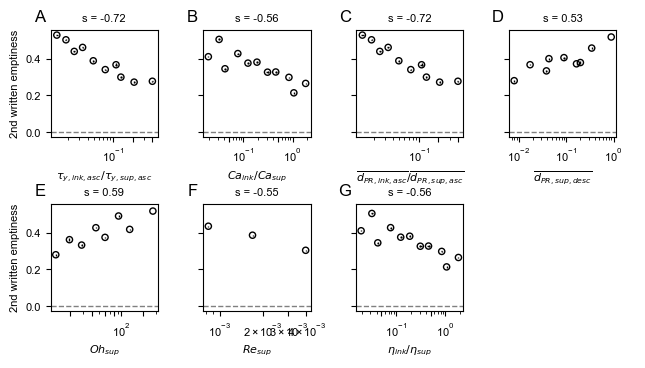

In [51]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'emptiness_w2o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.66,2.2e-12


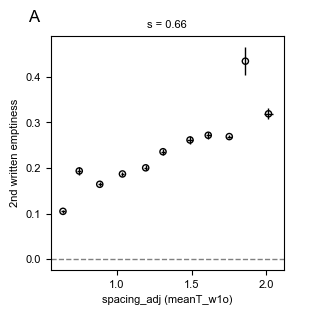

In [52]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'emptiness_w2o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.58,6.3e-54
1,spacing_adj,0.57,4.4e-53


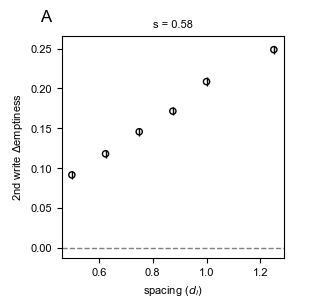

In [54]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_emptiness_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.58,2.7e-10
1,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.58,2.7e-10


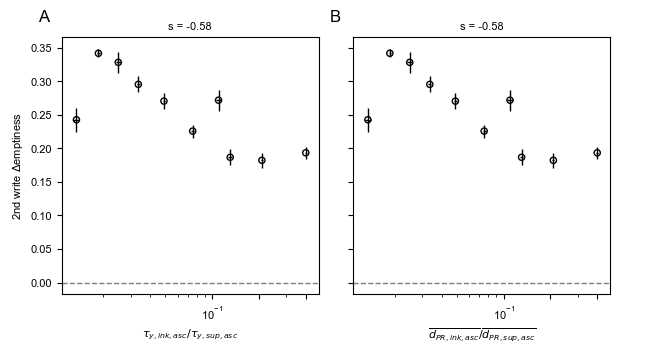

In [55]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_emptiness_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.56,1.6e-08
1,spacing_adj,0.54,5.0e-08


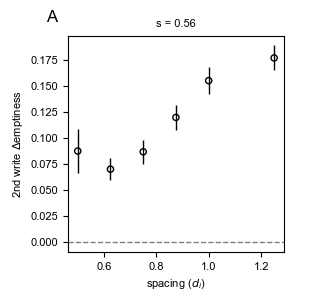

In [56]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_emptiness_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
2,$\overline{d_{PR.ink.desc}}\times \overline{d_...,-0.37,9.9e-03


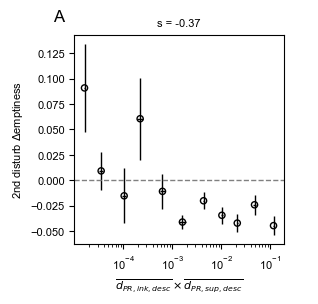

In [57]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_emptiness_disturb2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.58,5.0e-05
1,spacing_adj,0.63,6.4e-06


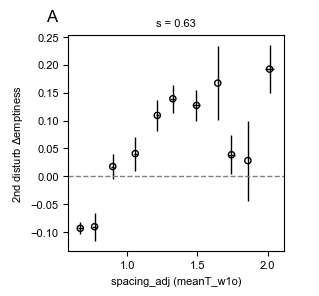

In [58]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_emptiness_disturb2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.ink.desc}}$,-0.45,9.9e-04


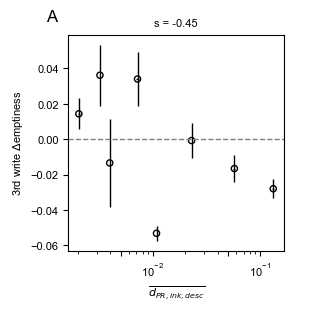

In [77]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_emptiness_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,spacing_adj,0.45,1.5e-03


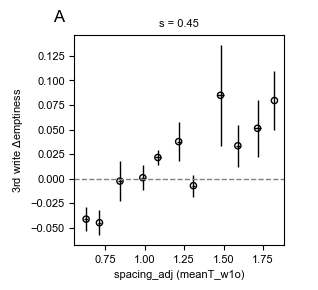

In [78]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_emptiness_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

## roughness

,variable,Spearman coeff,Spearman p
0,spacing,0.64,2.1e-70
1,spacing_adj,0.65,6.2e-73


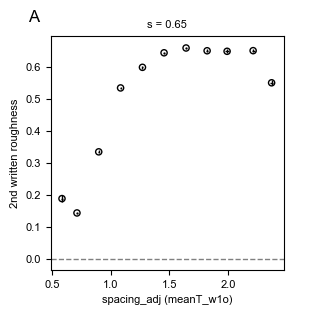

In [94]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'roughness_w2o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

In [4]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.875], 'roughness_w2o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.sup.desc}}$,0.51,5.6e-08
1,$Oh_{sup}$,0.63,3.0e-12
2,$Re_{sup}$,-0.68,1.0e-14
3,$\eta_{sup}$,0.68,1.0e-14


,variable,Spearman coeff,Spearman p
0,$Gd_{ink}/Gd_{sup}$,-0.65,3.2e-13
1,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.72,5.8e-17
2,$Ca_{ink}/Ca_{sup}$,-0.61,2.1e-11
3,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.72,5.8e-17
4,$Oh_{ink}/Oh_{sup}$,-0.61,2.6e-11
5,$Re_{ink}/Re_{sup}$,0.61,3.5e-11
6,$\eta_{ink}/\eta_{sup}$,-0.61,2.1e-11


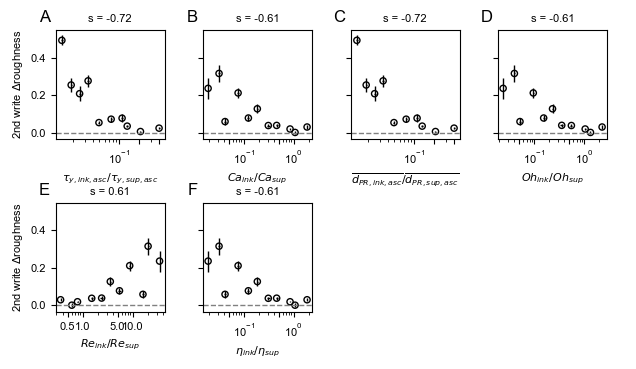

In [97]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'delta_roughness_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.65,1.4e-72
1,spacing_adj,0.66,1.1e-76


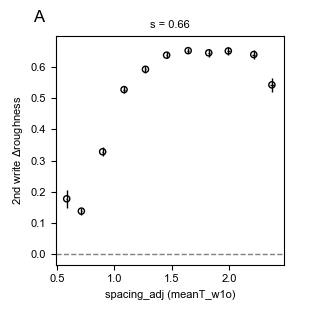

In [98]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_roughness_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p


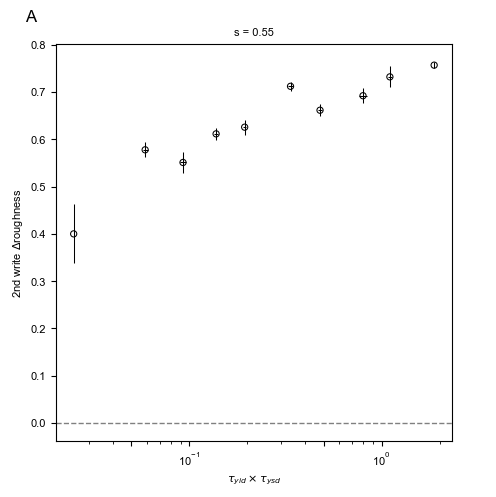

In [16]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_roughness_write2', spacing=1.25, logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

In [9]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_roughness_disturb2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
17,$DR_{iaa}\times DR_{saa}$,0.49,8.26e-19


,variable,Spearman coeff,Spearman p


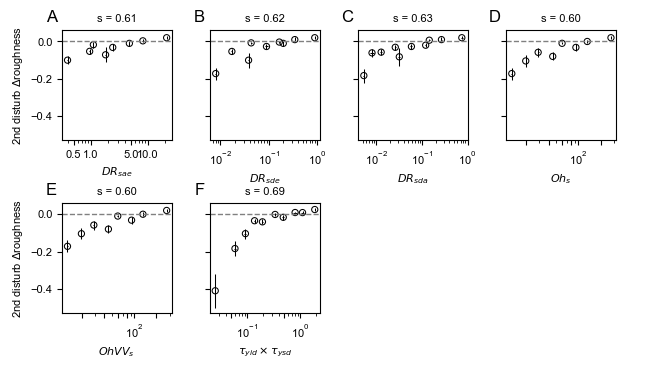

In [14]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_roughness_disturb2', spacing=1.25, logy=False, printOut=False, trimVariables=True, package='tabularShort'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.80,3.8e-67
1,spacing_adj,0.80,4.0e-67


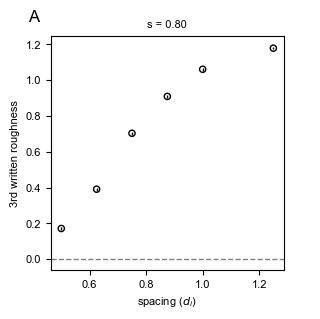

In [110]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'roughness_w3o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,$Re_{sup}$,-0.46,8.2e-04
1,$\eta_{sup}$,0.46,8.2e-04


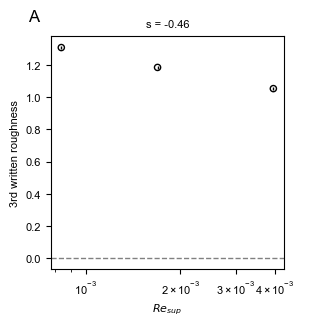

In [112]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'roughness_w3o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.64,7.3e-07
1,$Ca_{ink}/Ca_{sup}$,-0.51,1.8e-04
2,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.64,7.3e-07
3,$Oh_{ink}/Oh_{sup}$,-0.51,1.9e-04
4,$Re_{ink}/Re_{sup}$,0.50,2.2e-04
5,$\eta_{ink}/\eta_{sup}$,-0.51,1.8e-04


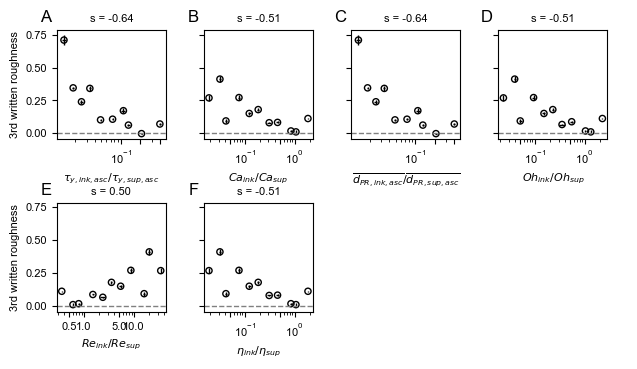

In [113]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'roughness_w3o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.76,3.5e-58
1,spacing_adj,0.74,4.6e-54


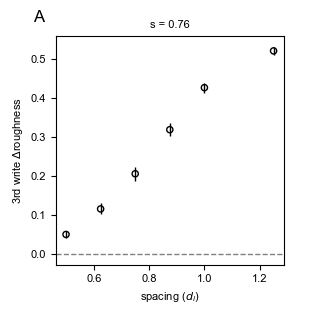

In [114]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_roughness_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
2,$\eta_{ink}\times \eta_{sup}$,-0.36,1.0e-02


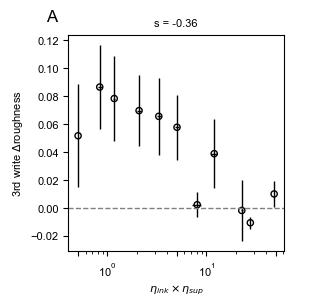

In [116]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'delta_roughness_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

## segments

,variable,Spearman coeff,Spearman p
0,spacing,0.74,3.8e-102
1,spacing_adj,0.77,1.9e-116


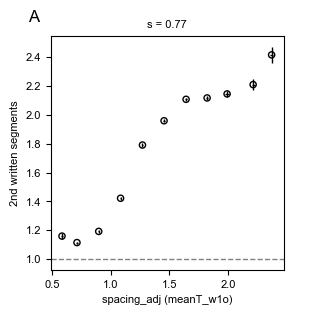

In [122]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_w2o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

In [7]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_w2o', spacing=0.875, logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,adjusted spacing,0.37,1.7e-04


,variable,Spearman coeff,Spearman p
0,spacing,0.75,6.9e-109
1,spacing_adj,0.78,3.8e-123


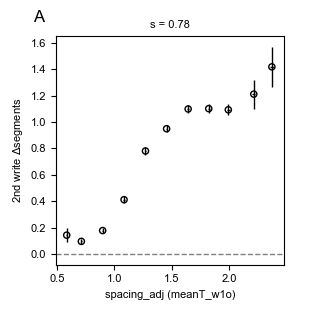

In [124]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_segments_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.53,1.1e-04
1,$Ca_{ink}$,-0.58,1.5e-05
2,$Ca_{ink}\times Ca_{sup}$,-0.58,1.0e-05
3,$\overline{d_{PR.ink.asc}}$,-0.58,1.1e-05
4,$\overline{d_{PR.ink.asc}}\times \overline{d_{...,-0.62,1.8e-06
5,$\overline{d_{PR.ink.desc}}$,-0.54,6.9e-05
6,$\overline{d_{PR.sup.desc}}$,-0.53,8.9e-05
7,$\overline{d_{PR.ink.desc}}\times \overline{d_...,-0.57,2.3e-05
8,$We_{sup}$,-0.52,1.1e-04
9,$We_{ink}\times We_{sup}$,-0.50,2.2e-04


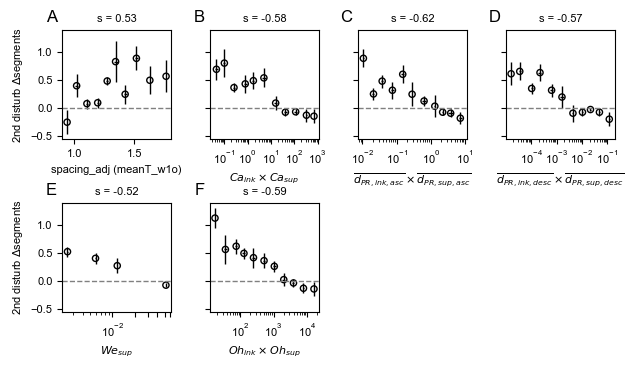

In [128]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.875], 'delta_segments_disturb2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.52,1.8e-04


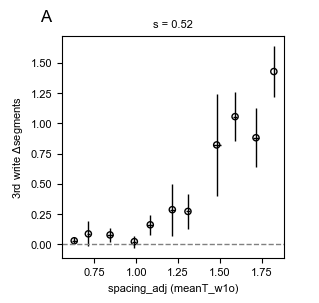

In [131]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_segments_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.41,3.5e-03


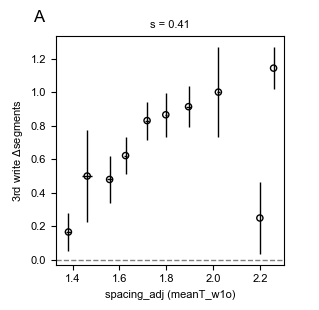

In [133]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_segments_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

## space_at

In [37]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dxprint_d1p', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
42,$Bm_{ink.desc}/Bm_{sup.desc}$,-0.44,5.73e-15


,variable,Spearman coeff,Spearman p
0,$Ga_{ink}/Ga_{sup}$,-0.66,7.1e-14
1,$Gd_{ink}/Gd_{sup}$,-0.68,6.7e-15
2,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.69,5.2e-15
3,$Ca_{ink}/Ca_{sup}$,-0.71,1.9e-16
4,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.69,5.2e-15
5,$Oh_{ink}/Oh_{sup}$,-0.71,2.6e-16
6,$Re_{ink}/Re_{sup}$,0.70,3.8e-16
7,$Bm_{ink.desc}$,0.61,1.9e-11
8,$Bm_{ink.desc}\times Bm_{sup.desc}$,0.65,2.0e-13
9,$Bm_{ink.desc}/Bm_{sup.desc}$,0.61,3.2e-11


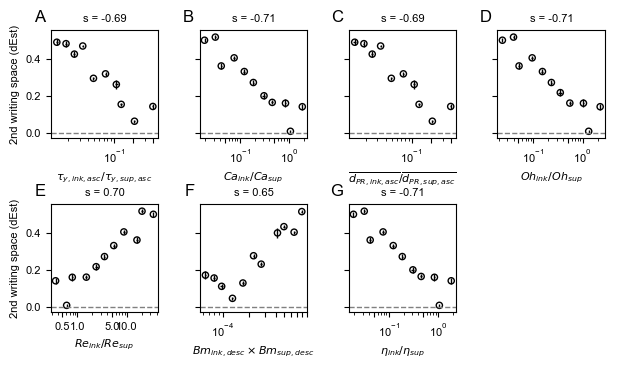

In [136]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'space_at_w2p', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.51,2.2e-41


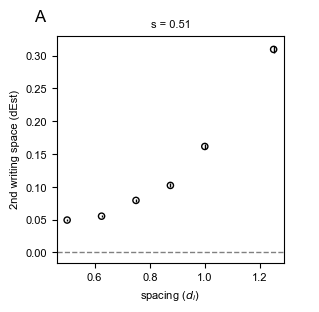

In [139]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_at_w2p', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.52,1.2e-21


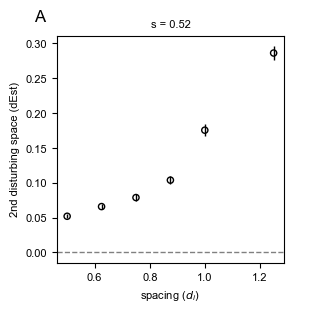

In [140]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_at_d2p', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.64,8.9e-07
1,$Ca_{ink}/Ca_{sup}$,-0.55,4.7e-05
2,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.64,8.9e-07
3,$Oh_{ink}/Oh_{sup}$,-0.54,5.2e-05
4,$Re_{ink}$,0.55,4.5e-05
5,$Re_{ink}/Re_{sup}$,0.54,5.8e-05
6,$Bm_{ink.desc}$,0.53,7.6e-05
7,$Bm_{ink.desc}\times Bm_{sup.desc}$,0.57,2.1e-05
8,$Bm_{ink.desc}/Bm_{sup.desc}$,0.54,6.2e-05
9,$\eta_{ink}$,-0.55,4.5e-05


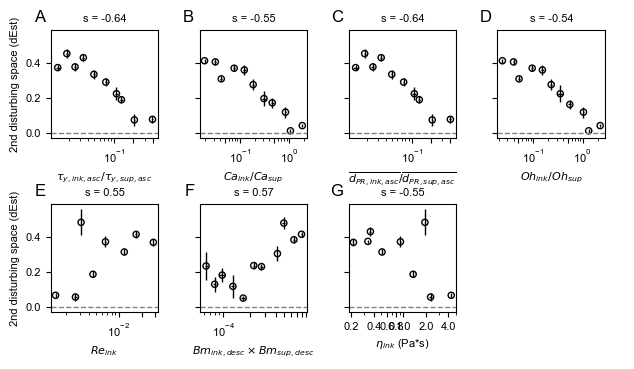

In [141]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'space_at_d2p', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.51,2.2e-41


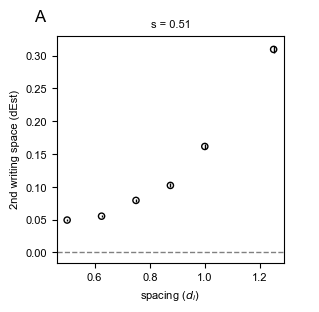

In [142]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_at_w2p', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Gta_{ink}/Gta_{sup}$,-0.54,5.6e-05
1,$Ga_{ink}/Ga_{sup}$,-0.55,3.5e-05
2,$Gd_{ink}/Gd_{sup}$,-0.54,4.9e-05
3,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.59,5.7e-06
4,$Ca_{ink}/Ca_{sup}$,-0.54,4.5e-05
5,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.59,5.7e-06
6,$Oh_{ink}/Oh_{sup}$,-0.54,4.7e-05
7,$Re_{ink}$,0.56,2.4e-05
8,$Re_{ink}/Re_{sup}$,0.54,5.1e-05
9,$Bm_{ink.desc}\times Bm_{sup.desc}$,0.53,7.3e-05


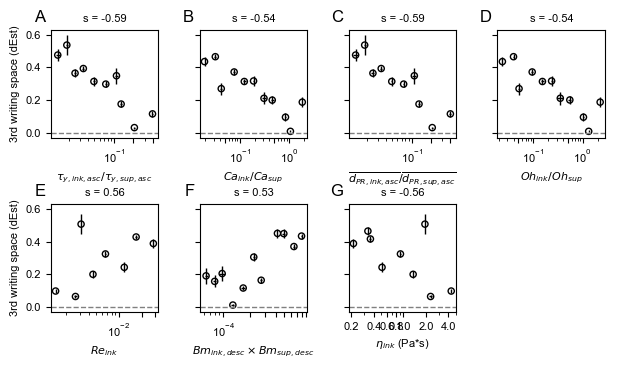

In [145]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_at_w3p', spacing=1.25, logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.48,9.8e-19


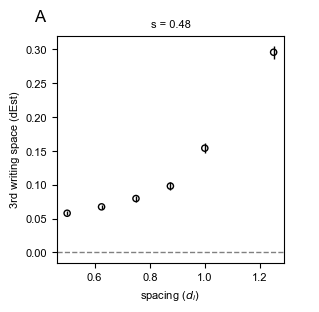

In [146]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_at_w3p',logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

## x0

,variable,Spearman coeff,Spearman p
0,$Re_{sup}$,-0.65,3.4e-07
1,$\eta_{sup}$,0.65,3.4e-07


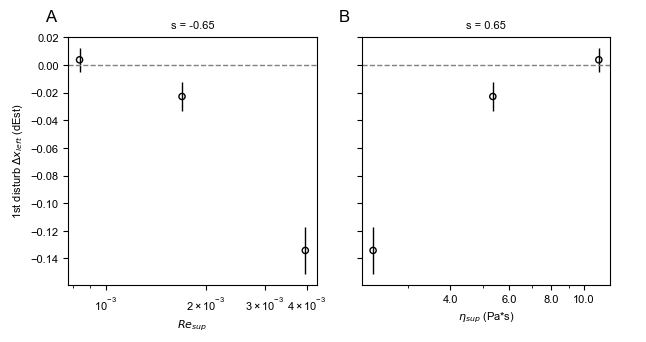

In [156]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_x0_disturb1', spacing=0.5, logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.80,3.3e-09


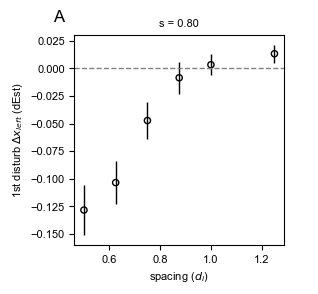

In [157]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_x0_disturb1',  logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

In [7]:
rgt = mp.regressionTableSDT(ms, ms.ss,'delta_x0_disturb1',  logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.26,5.9e-06


,variable,Spearman coeff,Spearman p
0,spacing,0.75,4.5e-17
1,spacing_adj,0.71,4.3e-15


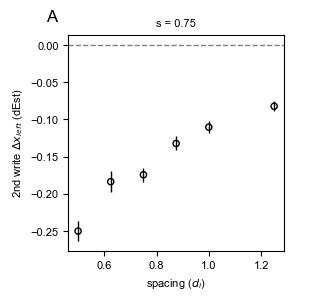

In [160]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_x0_write2',  logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,$Re_{sup}$,-0.45,2.8e-06
1,$\eta_{sup}$,0.45,2.8e-06


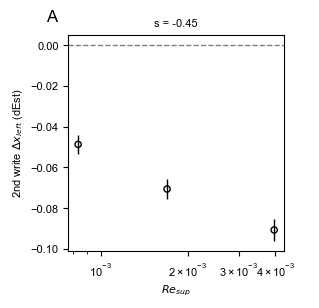

In [163]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_x0_write2', spacing=1.250, logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Ca$,0.51,8.0e-08
1,$Ca_{sup}$,0.51,8.0e-08
2,$\overline{d_{PR.sup.desc}}$,0.54,1.2e-08
3,$Oh_{sup}$,0.63,3.4e-12
4,$Re_{sup}$,-0.58,2.6e-10
5,$\eta_{sup}$,0.58,2.6e-10


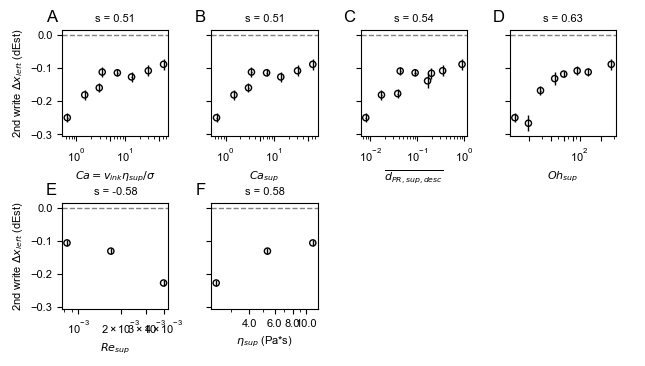

In [162]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_x0_write2', spacing=0.5, logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Re_{sup}$,0.52,1.1e-04
1,$\eta_{sup}$,-0.52,1.1e-04


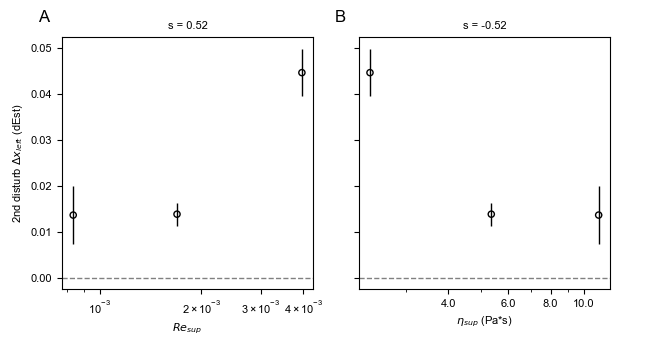

In [168]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_x0_disturb2', spacing=0.875, logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

In [11]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_x0_disturb2', spacing=0.5,logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

,variable,Spearman coeff,Spearman p
3,$Bm_{ink.asc}/Bm_{sup.asc}$,0.49,3.9e-04


,variable,Spearman coeff,Spearman p
0,spacing,0.58,1.4e-28


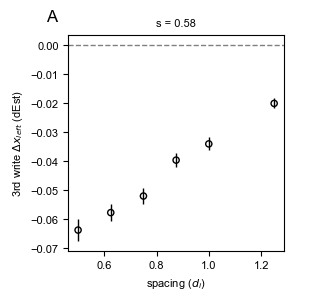

In [170]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_x0_write3',  logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

## xf

,variable,Spearman coeff,Spearman p
0,spacing,0.72,9.8e-08
1,adjusted spacing,0.68,6.7e-07


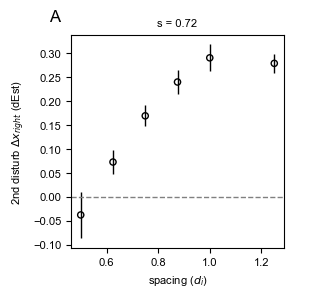

In [16]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_xf_disturb2', Camax=1,  logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.69,2.7e-06


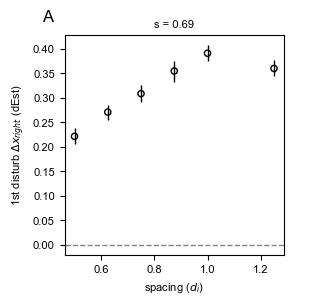

In [17]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_xf_disturb1', Camax=1,  logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig